In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib as mpl

In [58]:
df = pd.read_csv('iris.csv')
df = df.iloc[:,1:5]
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


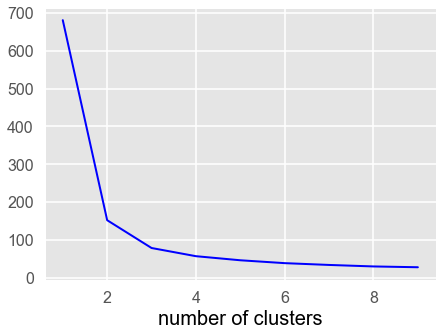

In [107]:
#Finding optimum number of clusters, the Silhouette method.
s_score = [] 
for k in range(1,10):
    clusterer = KMeans(n_clusters = k, 
                    max_iter = 300, n_init = 10, random_state = 10 )
    clusterer.fit(df)
    s_score.append(clusterer.inertia_)
    
#Plotting the ELBOW
plt.style.use('ggplot')
mpl.rcParams['lines.linewidth'] = 2
ax = plt.figure(figsize=(7,5))
plt.plot([i for i in range(1,10)],s_score , color = 'b')
plt.xlabel('number of clusters',size = 20, color = 'black')
plt.show()

In [108]:
#Optimum number of clusters are 3
#Fit the data 
clusterer = KMeans(n_clusters=3 , random_state= 10,max_iter = 300, n_init = 10)
clusterer.fit(df)

KMeans(n_clusters=3, random_state=10)

In [111]:
#acquiring the labels and the clusters centers
labels = clusterer.fit_predict(df)
center_c = clusterer.cluster_centers_
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

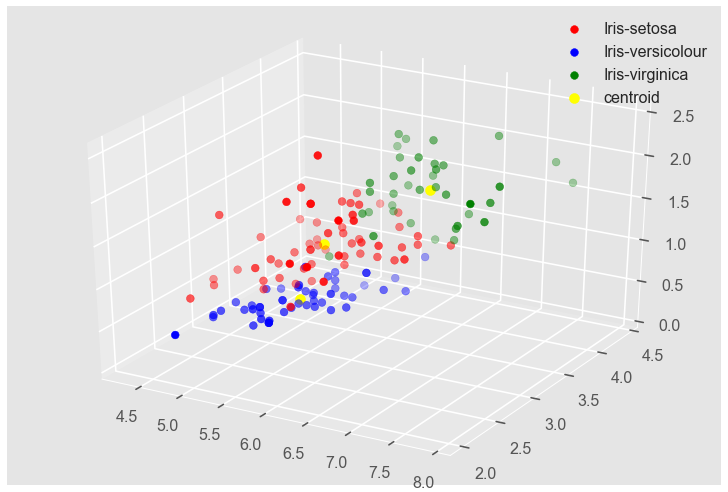

In [118]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.iloc[labels==0,0],df.iloc[labels==0,1],df.iloc[labels==0,3],s=60,color = 'red', label='Iris-setosa')
ax.scatter(df.iloc[labels==1,0],df.iloc[labels==1,1],df.iloc[labels==1,3],s=60,color = 'b', label='Iris-versicolour')
ax.scatter(df.iloc[labels==2,0],df.iloc[labels==2,1],df.iloc[labels==2,3],s=60,color = 'green', label='Iris-virginica')
ax.scatter(center_c[0][0],center_c[0][1],center_c[0][3],s=100,color = 'yellow', label='centroid')
ax.scatter(center_c[1][0],center_c[1][1],center_c[1][3],s=100,color = 'yellow')
ax.scatter(center_c[2][0],center_c[2][1],center_c[2][3],s=100,color = 'yellow')
plt.legend()
plt.show()